In [2]:
#importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split #supervised learning
from sklearn.ensemble import RandomForestClassifier #RF
from sklearn.tree import DecisionTreeClassifier #DT
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score #metrics to evaluate model

In [4]:
#read kyphosis dataset, number drops the columns
df = pd.read_csv("kyphosis.csv").drop("Number", axis = 1)
df

,Kyphosis,Age,Start
0,absent,71,5
1,absent,158,14
2,present,128,5
3,absent,2,1
4,absent,1,15
...,...,...,...
76,present,157,13
77,absent,26,13
78,absent,120,13
79,present,42,6


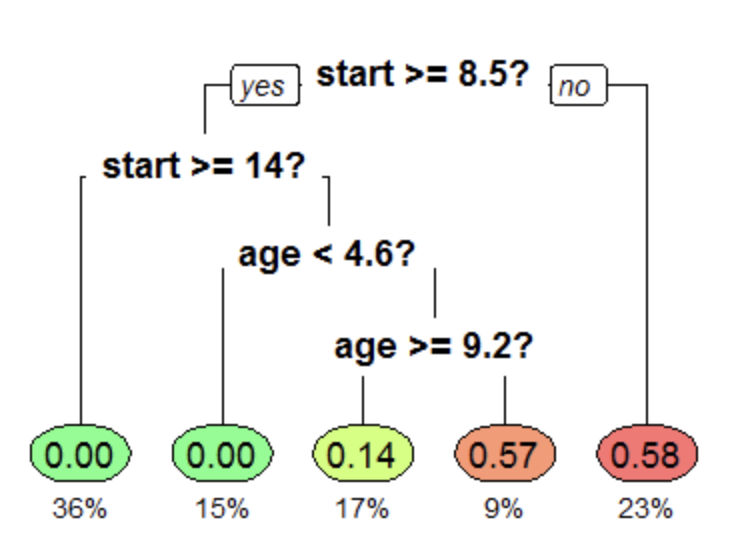

In [5]:
#implementing decision tree based on above image
def simple_tree(age, start):
    '''
    Decision tree that takes in two features,
    age and start anmd return kyphosis prediction (present/absent)
    '''

    #first node of dt
    if start < 8.5:

        #chooses either 0 or 1 with a 58% probability
        return np.random.binomial(n=1, p =0.58)

    #second node
    if start >=14:
        return 0

    #third node
    if age < 4.6:
        return 0

    #fourth node
    if age >= 9.2:
        return np.random.binomial(n=1, p =0.14)

    return np.random.binomial(n=1, p =0.57)

In [6]:
def get_accuracy():
    #making predictions with decision tree implemented
    kyphosis_pred = []

    #single prediction tgoverned by simple tree function, where parameters are
    #age and start from the dataset
    for data in df.values:
        prediction = simple_tree(data[1], data[2])

        #real answer
        actual = data[0] == 'present'

        #appends actual values from dataset if prediction is correct or if it is incorrect
        if prediction == actual:
            kyphosis_pred.append(1)
        else:
            kyphosis_pred.append(0)

    #prints ratio of successful predictions
    return 100 * np.sum(kyphosis_pred)/len(kyphosis_pred)

78.37037037037038 3.4190176149002682


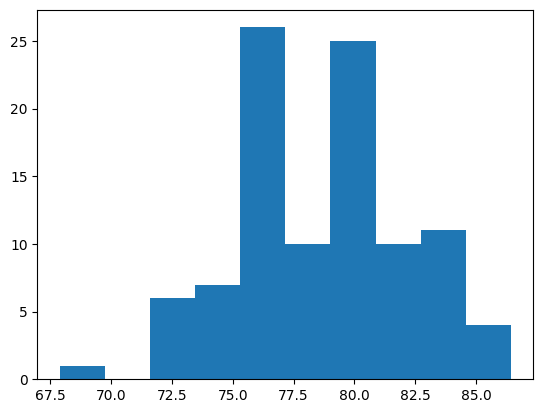

In [7]:
#adding new column of accuracy score
accuracy_scores = []
for i in range(100):
    accuracy_scores.append(get_accuracy())

#plotting a histogram of accuracy scores with mean results and std deviation
plt.hist(accuracy_scores)
print(np.mean(accuracy_scores), np.std(accuracy_scores))

In [8]:
#do not want kyphosis column when plotting
X = df.drop('Kyphosis', axis = 1)

#representing tags
y = df['Kyphosis']

#split this data into train test datasets (randomly)
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [12]:
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)

#score based on test data
random_forest.score(X_test, y_test)

0.8095238095238095